#### PRELIMINARIES

First we import the libraries we will need, and the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Import data

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data = data.drop(['Random 1', 'Random 2', 'Gross pay transform'],  axis=1)

In [3]:
data

,Gross pay,Phi-h,Position,Pressure,Production
0,0.1,0.5,2.1,19,15.10
1,1.0,4.0,1.1,16,21.30
2,1.9,19.0,1.0,14,22.75
3,3.1,21.7,2.1,17,15.72
4,4.1,24.6,2.9,11,7.71
5,4.9,39.2,1.1,12,22.67
6,5.9,23.6,2.1,13,18.11
7,7.0,63.0,2.0,13,24.30
8,8.1,72.9,2.9,14,24.04
9,8.9,35.6,2.8,16,25.11


A quick summary of the data (count row) shows there are no missing data points.

In [4]:
data.describe()

,Gross pay,Phi-h,Position,Pressure,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,33.428571
std,5.948521,45.167894,0.708721,2.759400,15.141909
min,0.100000,0.500000,1.000000,10.000000,7.710000
25%,4.900000,24.600000,1.100000,14.000000,22.670000
50%,10.000000,72.900000,2.000000,16.000000,36.420000
75%,15.100000,100.000000,2.200000,17.000000,44.200000
max,19.100000,160.000000,2.900000,20.000000,59.200000


We can also explicitly test to ensure data does not have no missing measurements.

In [5]:
data.isnull().values.any()

False

#### Linear regression in Seaborn with correlation coefficient shown

In [21]:
def corrfunc(x, y, **kws):
    (r, p) = sp.stats.spearmanr(x, y)
    ax = plt.gca()
    ax.annotate("CC = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes, fontsize = 16, color = 'darkblue')

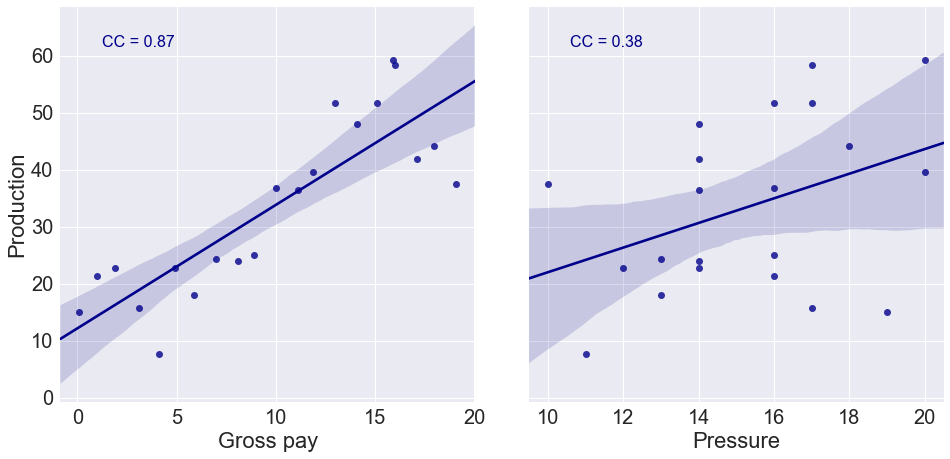

In [22]:
sns.set(font_scale=2)
g = sns.PairGrid(data, y_vars=["Production"], x_vars=['Gross pay', 'Pressure'],  size=7)
g.map(sns.regplot, color="darkblue")
g.map(corrfunc)
plt.show()